# Capital Projects

## Group 50

#### Joseph Tornetta

In [65]:
import pandas as pd
import geopandas

The town in the Lorax, Thneedville, was set up entirely as a result of capital greed. To find the neighborhood that best matches Thneedville, I will look at the captial projects throughout Pittsburgh, and find the best. 

In [66]:
capital = pd.read_csv("capitalprojects.csv", sep = ',', index_col = 'id')

capital.sample(5)


,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
1273388077,STEP REPAIR AND REPLACEMENT,FRAZIER STREET STEP UPGRADES,Engineering and Construction,200000.0,Planned,Frazier St from Bates St,Step,2020,2020-09-24,NaN,South Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-11,40.432454,-79.957794
337260139,RAMP AND PUBLIC SIDEWALK,ADA Curb Ramps and Public Sidewalks,Engineering and Construction,100000.0,Planned,NaN,Non-Asset,2017,2017-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932663062,URBAN REDEVELOPMENT AUTHORITY PERSONNEL,HOME program administration,Administration/Sub-Award,160000.0,Planned,NaN,Non-Asset,2017,2017-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1737804465,CAPITAL EQUIPMENT ACQUISITION,BACKHOE (1),Vehicles and Equipment,120750.0,Planned,NaN,Non-Asset,2019,2019-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1610645575,FACILITY IMPROVEMENTS - PUBLIC SAFETY FACILITIES,THADDEUS STEVENS SCHOOL - SPECIAL DEPLOYMENT D...,Facility Improvement,605000.0,In Progress,Thaddeus Stevens Elementary School,Facility,2019,2019-07-05,f,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442479,-80.040080


In [67]:
capital_projects.groupby(['neighborhood']).mean()

neighborhood
Allegheny Center       1962770.50
Allegheny West         6813068.20
Allentown               640500.00
Arlington               250000.00
Banksville             2973000.00
                          ...    
Upper Hill             1430968.75
Upper Lawrenceville       8500.00
West End                555057.58
Westwood                325000.00
Windgap                  85000.00
Name: budgeted_amount, Length: 73, dtype: float64

In [68]:
capital_projects.describe()

count    7.300000e+01
mean     1.940615e+06
std      2.504476e+06
min      5.200000e+03
25%      2.600000e+05
50%      1.000000e+06
75%      2.425127e+06
max      1.304770e+07
Name: budgeted_amount, dtype: float64

On average, the neighborhoods in Pittsburgh are spending around *1.94 million* dollars on each capital project. 

## Neighborhoods with Highest Budgets

To get a better sense of which neighborhoods are spending the most, we'll look at the total spending of each neighborhood, as well as the average they're spending on each project.

In [69]:
capital_projects = capital.groupby("neighborhood").sum()['budgeted_amount']
budget_capital = capital_projects.sort_values(ascending = False)

In [70]:
budget_capital.head()

neighborhood
Greenfield                   13047700.0
South Side Flats              9046026.0
Central Business District     8206845.0
Allegheny West                6813068.2
Elliott                       6675768.0
Name: budgeted_amount, dtype: float64

In [71]:
projects_neighborhood = capital.groupby("neighborhood").mean()['budgeted_amount']
projects_neighborhood.sort_values(ascending = False).head()

neighborhood
Knoxville         1.450000e+06
Swisshelm Park    1.365667e+06
Greenfield        1.003669e+06
Allegheny West    9.732955e+05
Banksville        7.432500e+05
Name: budgeted_amount, dtype: float64

Unlike the total budget of each neighborhood, *Knoxville*, tops the chart at around **1.45 million dollars** per project. Greenfield, however, has the highest total budget for captial projects.

There are a lot of NaN, so we'll drop the columns that don't mean much to our metric.

In [72]:
capital_df = capital.dropna()
capital_df.sample(5)

,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
862962060,RECREATION AND SENIOR CENTERS,Brighton Heights - Roof,Facility Improvement,50000.0,Planned,B600 - Brighton Heights Senior Center Roof,Roofing System,2017,2017-02-08,f,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.479269,-80.035784
1806724539,PENNDOT LOCAL SHARE (TIP),Signal Replacement,Engineering and Construction,3000.0,Planned,TS267,Signalized Intersection,2017,2017-02-08,f,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456418,-79.998660
1175169281,SPORT FACILITY IMPROVEMENTS,Court Repair with ARMORÂ® Crack and Color Coat...,Facility Improvement,38250.0,Canceled,Arlington Park Basketball Court 1,Court,2017,2017-03-07,f,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-22,40.417981,-79.975032
1934747185,LIBERTY AVENUE (HSIP),LIBERTY AVE (HSIP) - FINAL DESIGN,Engineering and Construction,100000.0,Planned,954,Pavement,2019,2019-02-05,f,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.449853,-79.984346
2083103113,PLAY AREA IMPROVEMENTS,Allegheny Commons Park - Safety Surface,Facility Improvement,57000.0,Completed,Sue Murray Playground,Playground,2018,2018-04-04,f,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.451632,-80.001547


In [73]:
#mask to only look at neighborhoods above threshold
project_mask = capital_df['budgeted_amount'] >= 1200000
high_budget = capital_df[project_mask]
high_budget.shape[0]

10

In [74]:
high_budget.sort_values(by = 'budgeted_amount', ascending = False).head(7)

,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
2081497510,PARK RECONSTRUCTION,Wightman Park Improvements and Green Stormwate...,Facility Improvement,4003435.0,In Progress,Wightman Park,Park,2018,2018-04-04,f,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-18,40.443336,-79.927064
223087014,McFARREN STREET (SECOND AVENUE) BRIDGE (TIP),Bridge Construction,Engineering and Construction,3382000.0,Planned,MacFarren St Bridge,Bridge,2018,2018-03-07,f,Swisshelm Park,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-12,40.415542,-79.916199
1975162648,WEST OHIO STREET BRIDGE (TIP),Construction Phase,Engineering and Construction,2479500.0,Planned,West Ohio Street Bridge,Bridge,2017,2017-02-08,f,Allegheny West,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.451619,-80.010673
579358971,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,2240000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,f,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
130752420,CHARLES ANDERSON BRIDGE (TIP),Charles Anderson Bridge - Final Design,Engineering and Construction,2000000.0,Planned,Charles Anderson Bridge,Bridge,2018,2018-02-12,f,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
336270312,EAST CARSON STREET,EAST CARSON STREET - CONSTRUCTION,Engineering and Construction,2000000.0,Planned,7490,Pavement,2019,2019-02-05,f,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428797,-79.981305
1819629922,SMALLMAN STREET RECONSTRUCTION,SMALLMAN STREET - RECONSTRUCTION,Engineering and Construction,1730000.0,Planned,5012,Pavement,2019,2019-02-05,f,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.451167,-79.985512


The biggest project is Wightman Park improvements, spending around 4 million dollars

## Spending in Neighborhoods

To get a better sense of how many projects are still in progress around Pittsburgh, we'll look at the status of the highest total spending neighborhoods.

In [75]:
#create mask to look at individual neighborhoods
greenfield_mask = capital_df['neighborhood'] == 'Greenfield'
greenfield_df = capital_df[greenfield_mask]

greenfield_df['status'].value_counts()

Completed      5
In Progress    2
Planned        2
Canceled       1
Name: status, dtype: int64

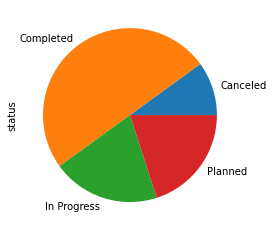

In [76]:
greenfield_df['status'].value_counts().sort_index().plot.pie()

In [77]:
south_mask = capital_df['neighborhood'] == 'South Side Flats'
south_df = capital_df[south_mask]

south_df['status'].value_counts()

Planned        10
Completed       5
In Progress     4
Name: status, dtype: int64

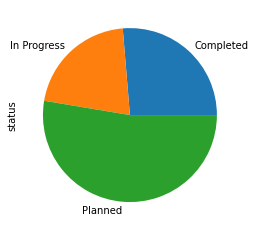

In [78]:
south_df['status'].value_counts().sort_index().plot.pie()

Since we want the neighborhood with most destruction, we'll just take into account projects that are in progress, or completed. 

In [92]:
#mask to keep in progress and completed
complete_project = capital_df['status'] != 'Planned'
complete_df = capital_df[complete_project]

total_budget = complete_df.groupby('neighborhood').sum()['budgeted_amount']

neighborhood
Central Business District    2685845.0
Name: budgeted_amount, dtype: float64

In [80]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

In [98]:
#plot based on total budget for each neighborhood
capital_map = neighborhoods.merge(total_budget, how='left', left_on='hood', right_on='neighborhood')
capital_map.dropna()
capital_map[['hood', 'budgeted_amount', 'geometry']]

,hood,budgeted_amount,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,23156.25,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,555057.58,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


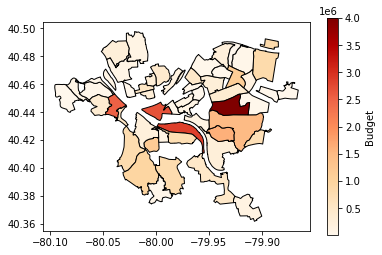

In [99]:
capital_map.plot(column = 'budgeted_amount', 
                cmap = 'OrRd',
                edgecolor = 'black',
                legend = True,
                legend_kwds = {'label': 'Budget'})

## Conclusion

For my final calculation, I will only look at the budget of projects that are completed or in-progress. That way, we can see which neighborhoods have had an immediate effect on them as a result of the projects. 

In [102]:
total_budget.sort_values(ascending = False)

neighborhood
Squirrel Hill North          4003435.00
South Side Flats             2852509.00
Central Business District    2685845.00
Elliott                      2543268.00
Greenfield                   1612700.00
Squirrel Hill South          1500500.00
Beltzhoover                  1181425.00
East Liberty                 1150200.00
Brookline                     967650.00
Lincoln-Lemington-Belmar      835777.07
Beechview                     815400.00
Carrick                       810627.00
South Side Slopes             739700.00
Swisshelm Park                715000.00
West End                      555057.58
Central Northside             537375.00
Hays                          500000.00
Lower Lawrenceville           490200.00
Spring Hill-City View         435000.00
Shadyside                     381660.00
Crafton Heights               374625.50
Fineview                      310000.00
Allegheny Center              302887.50
Bloomfield                    299711.00
Brighton Heights           

The highest budget for all capital projects in a neighborhood is in **Squirrel Hill North** with a budget of around **4 Million dollars**. South Side Flats and Central Business District follow with budgets of 2.8 million and 2.6 million respectively. 

Given this information, the best neighborhood in Pittsburgh is **Squirrel Hill North**. It best resembles Thneedville from the Lorax, given it's high capital budget.